# ML 4 - Support Vector Machines

In [160]:
!pip install cvxopt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cvxopt import matrix, solvers

Like on the perceptron algorithm, let's first choose two classes: Mango (1) and Orange (-1)

In [3]:
df = pd.read_excel('classification_features.xlsx')

# Get names of indexes to drop
indexNames = df[df['Class'] == 'Banana'].index

# Delete these row indexes from dataFrame
df.drop(indexNames, inplace=True)

# Replacing Mango and Orange with 1 and -1
df = df.replace(['Mango','Orange'], [1,-1])

df.head(5)

,Normalized Hue,Round,Class
0,0.623942,0.593,1
1,0.480354,0.579,1
2,0.627035,0.578,1
3,0.350753,0.692,1
4,0.553311,0.644,1


In [8]:
# get x and z
x = df[['Normalized Hue', 'Round']].values
z = df[['Class']].values

In [117]:
# define matrices H, A, B and vectors f,a,b
n = x.shape[0]

H = matrix((np.dot(x,x.T) * np.dot(z,z.T)) + np.eye(n)*0.005, tc='d') 
f = matrix(-np.ones((n,1)), tc='d')

A = matrix(-np.identity(n), tc='d')

a = matrix(np.zeros((n,1)), tc='d')

B = matrix(z, tc='d').T
b = matrix(float(0))

In [118]:
sol = solvers.qp(H, f, A, a, B, b)

     pcost       dcost       gap    pres   dres
 0: -2.4995e+01 -6.3758e+01  3e+02  2e+01  2e+00
 1: -3.3292e+01 -7.8572e+01  1e+02  6e+00  7e-01
 2: -1.3001e+02 -2.4513e+02  2e+02  3e+00  4e-01
 3: -1.2310e+02 -1.4855e+02  3e+01  2e-01  2e-02
 4: -1.3440e+02 -1.3690e+02  3e+00  6e-04  6e-05
 5: -1.3650e+02 -1.3658e+02  9e-02  2e-05  2e-06
 6: -1.3657e+02 -1.3657e+02  9e-04  2e-07  2e-08
 7: -1.3657e+02 -1.3657e+02  9e-06  2e-09  2e-10
Optimal solution found.


In [119]:
alpha = sol['x']

In [120]:
# calculating the weights and the bias
w = np.dot((alpha*z).T,x)
w0 = (1/z) - np.dot(x,w.T)
df_weights = pd.DataFrame(w0)

In [121]:
# calculating z
g = w0 + np.dot(x,w.T)
z_ = abs(g)/np.linalg.norm(w)

In [122]:
df_weights['z'] = z_

In [123]:
df_weights

,0,z
0,6.827901,0.08068
1,6.979555,0.08068
2,6.638112,0.08068
3,8.647896,0.08068
4,7.608116,0.08068
...,...,...
65,11.893728,0.08068
66,11.250222,0.08068
67,11.827428,0.08068
68,18.693195,0.08068


In [124]:
w0_best = df_weights.loc[df_weights['z'].idxmax()][0]

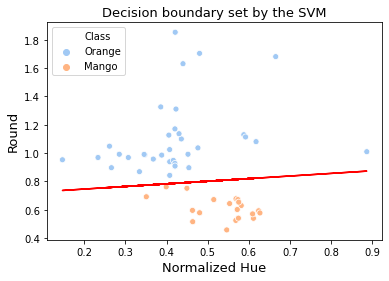

In [125]:
# plotting the decision line using the weights
C = w0_best
A = w.T[0]
B = w.T[1]

# plot equation of line
u = df['Normalized Hue']
v = -(C/B) - ((A/B)*u)


# plt.scatter(X['Normalized Hue'], X['Round'] )
plot = sns.scatterplot(data=df, x='Normalized Hue', y='Round',
                palette='pastel', hue='Class')
plot.set_xlabel('Normalized Hue', fontsize=13)
plot.set_ylabel('Round', fontsize=13)
L = plt.legend(loc='upper left')
L.get_texts()[1].set_text('Orange')
L.get_texts()[2].set_text('Mango')
plt.plot(u, v, '-r')
plt.title('Decision boundary set by the SVM', fontsize=13)
plt.savefig('svm0.006-acc-0.8.png')
plt.show()

In [35]:
# if the resulting v is positive then it's considered to be class 1 otherwise -1
test_val = w0_best + (w.T[0] * x[:,0]) + (w.T[1] * x[:,1])
test = []

for i in test_val:
    if i >= 0:
        test.append(1)
    else:
        test.append(-1)
        
test = np.array(test)
test = test.reshape((test.shape[0],1))

# testing accuracy
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(z,test))

Accuracy:  0.8


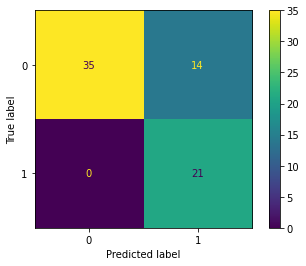

In [37]:
# confusion matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test, z)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.savefig('confusion_matrix-acc-0.8.png')